<a href="https://colab.research.google.com/github/TPShipilova/ML_5sem/blob/main/2/2lab_1contest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Шаг 1. Первичный анализ датасета.

Рассмотрим содержимое датасета.


    ApplicationDate: Дата подачи заявки на кредит
    Age: Возраст заявителя
    AnnualIncome: Годовой доход
    CreditScore: Оценка кредитоспособности
    LoanAmount: Запрашиваемая сумма кредита
    LoanDuration: Срок погашения кредита
    MaritalStatus: Семейное положение заявителя
    NumberOfDependents: Количество иждивенцев
    HomeOwnershipStatus: Статус владения жильем
    MonthlyDebtPayments: Ежемесячные обязательства по долгам
    CreditCardUtilizationRate: Процент использования кредитной карты
    NumberOfOpenCreditLines: Активные кредитные линии
    NumberOfCreditInquiries: Количество запросов на кредит
    DebtToIncomeRatio: Соотношение долга к доходу
    BankruptcyHistory: История банкротств
    LoanPurpose: Цель кредита
    PreviousLoanDefaults: Предыдущие дефолты по кредитам
    PaymentHistory: История платежей
    LengthOfCreditHistory: Длительность кредитной истории
    SavingsAccountBalance: Баланс сберегательного счета
    CheckingAccountBalance: Баланс расчетного счета
    TotalAssets: Общая стоимость активов
    TotalLiabilities: Общая сумма обязательств
    MonthlyIncome: Ежемесячный доход
    UtilityBillsPaymentHistory: История платежей по коммунальным услугам
    JobTenure: Длительность работы на текущем месте
    EmploymentStatus: Статус занятости
    EducationLevel: Уровень образования
    Experience: Опыт работы
    NetWorth: Чистая стоимость активов
    BaseInterestRate: Базовая процентная ставка
    InterestRate: Применяемая процентная ставка
    MonthlyLoanPayment: Ежемесячный платеж по кредиту
    TotalDebtToIncomeRatio: Общее соотношение долга к доходу
    LoanApproved: Статус одобрения кредита
    RiskScore: Оценка риска


Выведем информацию о данных с помощью info и describe

In [1]:
# Загрузка всех необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
# Загрузка набора данных
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/contest 1/train.csv')

In [3]:
# Первичный анализ данных
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             10487 non-null  object 
 1   Age                         10487 non-null  float64
 2   AnnualIncome                10487 non-null  float64
 3   CreditScore                 9986 non-null   float64
 4   LoanAmount                  9986 non-null   float64
 5   LoanDuration                10487 non-null  float64
 6   MaritalStatus               10487 non-null  object 
 7   NumberOfDependents          10487 non-null  float64
 8   HomeOwnershipStatus         10487 non-null  object 
 9   MonthlyDebtPayments         9986 non-null   float64
 10  CreditCardUtilizationRate   10487 non-null  float64
 11  NumberOfOpenCreditLines     10487 non-null  float64
 12  NumberOfCreditInquiries     10487 non-null  float64
 13  DebtToIncomeRatio           104

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,UtilityBillsPaymentHistory,JobTenure,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,10487.000000,10487.000000,9986.000000,9986.000000,10487.000000,10487.000000,9986.000000,10487.000000,10487.000000,10487.000000,...,10487.000000,10487.000000,10487.000000,9.986000e+03,9986.000000,10487.000000,10487.000000,10487.000000,10487.000000,1.048700e+04
mean,39.850386,131587.872127,678.082716,29874.218306,53.439878,1.568323,546.458642,0.284397,3.033565,0.979498,...,0.784428,4.949271,17.628302,1.542381e+05,0.200392,0.200112,1075.622426,0.517577,0.511776,-2.569878e+04
std,11.614132,115791.941909,175.192486,27705.509722,24.493562,1.418684,501.981888,0.159240,1.740186,0.990927,...,0.123039,2.201100,11.337248,4.622229e+05,0.094388,0.096458,1344.053181,0.894637,0.499885,1.431675e+06
min,18.000000,15000.000000,300.000000,1063.000000,12.000000,0.000000,13.000000,0.003674,0.000000,0.000000,...,0.259301,0.000000,0.000000,1.004000e+03,0.052494,0.046445,30.008506,0.006064,0.000000,-9.999999e+06
25%,32.000000,20959.500000,550.000000,12658.000000,36.000000,0.000000,233.250000,0.158929,2.000000,0.000000,...,0.708475,3.000000,9.000000,7.252500e+03,0.119908,0.119548,375.872620,0.066734,0.000000,3.256475e+01
50%,40.000000,89015.000000,722.500000,21828.500000,48.000000,1.000000,398.000000,0.262229,3.000000,1.000000,...,0.803692,5.000000,17.000000,2.742950e+04,0.182023,0.180710,684.878529,0.178193,1.000000,4.411876e+01
75%,48.000000,257025.000000,850.000000,37158.000000,60.000000,3.000000,685.000000,0.391683,4.000000,2.000000,...,0.879312,6.000000,26.000000,1.241758e+05,0.264709,0.264880,1279.930203,0.637457,1.000000,6.535690e+01
max,80.000000,748508.000000,850.000000,418997.000000,120.000000,6.000000,10879.000000,0.914635,12.000000,6.000000,...,0.996573,17.000000,57.000000,1.126117e+07,0.722497,0.833647,29634.807816,24.383046,1.000000,1.000000e+07


Таким образом, мы видим:


*   MaritalStatus, HomeOwnershipStatus, LoanPurpose, EmploymentStatus и EducationLevel являются категориальными признаками, то есть пропуски в таких данных будем заменять на моду, а потом преобразовывать с помощью one-hot-encoding.
*   В целом, в данных присутствуют пропуски и, возможно, дубликаты. Их мы просто удалим с помощью dropna и drop_duplicates.





In [4]:
# Очистка данных
df.dropna(how='all', inplace=True)
df.drop_duplicates(inplace=True)
print(df.isnull().sum())

ApplicationDate                 0
Age                             0
AnnualIncome                    0
CreditScore                   471
LoanAmount                    471
LoanDuration                    0
MaritalStatus                   0
NumberOfDependents              0
HomeOwnershipStatus             0
MonthlyDebtPayments           471
CreditCardUtilizationRate       0
NumberOfOpenCreditLines         0
NumberOfCreditInquiries         0
DebtToIncomeRatio               0
BankruptcyHistory             471
LoanPurpose                   471
PreviousLoanDefaults            0
PaymentHistory                  0
LengthOfCreditHistory           0
SavingsAccountBalance           0
CheckingAccountBalance        471
TotalAssets                   471
TotalLiabilities                0
MonthlyIncome                   0
UtilityBillsPaymentHistory      0
JobTenure                       0
EmploymentStatus                0
EducationLevel                  0
Experience                      0
NetWorth      

Теперь проверили на пропуски с помощью isnull().
Они остались после dropna, так что заполним и их тоже.

# Шаг 2. Обработка train датасета

Начнем с удаления выбросов для RiskScore

In [5]:
# Обработка выбросов таргета
q1 = df['RiskScore'].quantile(0.25)
q3 = df['RiskScore'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df['RiskScore'] >= lower_bound) & (df['RiskScore'] <= upper_bound)]
df['RiskScore'].describe()

,RiskScore
count,9788.000000
mean,48.325333
std,17.233659
min,14.841417
25%,32.717486
50%,44.180868
75%,65.090711
max,97.597249


Заполним пропуски. Для категориальных признаков исползуем моду, для остальных - метод k-ближайших соседей.

In [6]:
# Обработка категориальных признаков
cat_cols = ['MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose', 'EmploymentStatus', 'EducationLevel']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode().iloc[0])

# Обработка числовых признаков
num_cols = [col for col in df.columns if col not in ['ApplicationDate'] + cat_cols + ['RiskScore']]
imputer = KNNImputer(n_neighbors=5)
df[num_cols] = imputer.fit_transform(df[num_cols])

Теперь используем one-hot-encoding для MaritalStatus, HomeOwnershipStatus, LoanPurpose, EmploymentStatus.

In [8]:
# Кодирование категориальных признаков с помощью one-hot encoding
df = pd.get_dummies(df, columns=['MaritalStatus'], drop_first=True)
df = pd.get_dummies(df, columns=['HomeOwnershipStatus'], drop_first=True)
df = pd.get_dummies(df, columns=['LoanPurpose'], drop_first=True)
df = pd.get_dummies(df, columns=['EmploymentStatus'], drop_first=True)

Для EducationLevel применим label-encoding, так как уровень образования может повлиять на итоговое обучение.

In [9]:
# Кодирование признака EducationLevel с помощью Label Encoding
encoder = LabelEncoder()
df['EducationLevel_encoded'] = encoder.fit_transform(df['EducationLevel'])
df = df.drop('EducationLevel', axis=1)

Удалим столбец ApplicationDatе, так как он не нужен для обучения.

In [10]:
# Удаление ненужных столбцов
df = df.drop('ApplicationDate', axis=1)

Наконец, нормализуем данные с помощью MinMaxScaler

In [11]:
# Масштабирование признаков
scaler = MinMaxScaler()
cols_to_normalize = [col for col in df.columns if col != 'RiskScore']
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

Посмотрим, что получилось:

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9788 entries, 0 to 9999
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             9788 non-null   float64
 1   AnnualIncome                    9788 non-null   float64
 2   CreditScore                     9788 non-null   float64
 3   LoanAmount                      9788 non-null   float64
 4   LoanDuration                    9788 non-null   float64
 5   NumberOfDependents              9788 non-null   float64
 6   MonthlyDebtPayments             9788 non-null   float64
 7   CreditCardUtilizationRate       9788 non-null   float64
 8   NumberOfOpenCreditLines         9788 non-null   float64
 9   NumberOfCreditInquiries         9788 non-null   float64
 10  DebtToIncomeRatio               9788 non-null   float64
 11  BankruptcyHistory               9788 non-null   float64
 12  PreviousLoanDefaults            9788 no

# Шаг 3. Обучение модели

Воспользуемся библиотечной линейной регрессией

In [13]:
train_data = df

Разделим датафрейм на часть для обучаения и таргетный столбец.

In [14]:
X_train = train_data.drop('RiskScore', axis=1)
y_train = train_data['RiskScore']

Теперь обучим линейную регрессию.

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Шаг 4. Оценка модели на train датасете

Применим сразу три метрики, чтобы сравнить возможные ошибки

In [16]:
# Прогнозирование
y_pred = model.predict(X_train)

# Оценка модели
mse = mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 20.366578175799493
Mean Absolute Error: 3.5073377692738954
R^2 Score: 0.9314184257574991


Попробуем использовать Ridge-регуляризацию, чтобы избежать возможного переобучения и лучше обобщить данные.

In [17]:
# Обучение модели Ridge-регрессии

# Создание модели Ridge с заданным значением альфа (параметр регуляризации)
alpha_value = 1.0
model_reg = Ridge(alpha=alpha_value)

# Обучение модели
model_reg.fit(X_train, y_train)

# Прогнозирование
y_pred = model_reg.predict(X_train)

# Оценка модели
mse = mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 20.40818027067741
Mean Absolute Error: 3.5120236039648116
R^2 Score: 0.9312783365813063


Видим, что регуляризация не дала существенных улучшений на данном наборе данных, но все же используем ее во избежание ошибок.

Попробуем также посмотреть, что получится, если удалить коррелирующие признаки.

Выведем корреляционную матрицу, чтобы выявить сильно зависимые признаки и удалить некоторые из них.

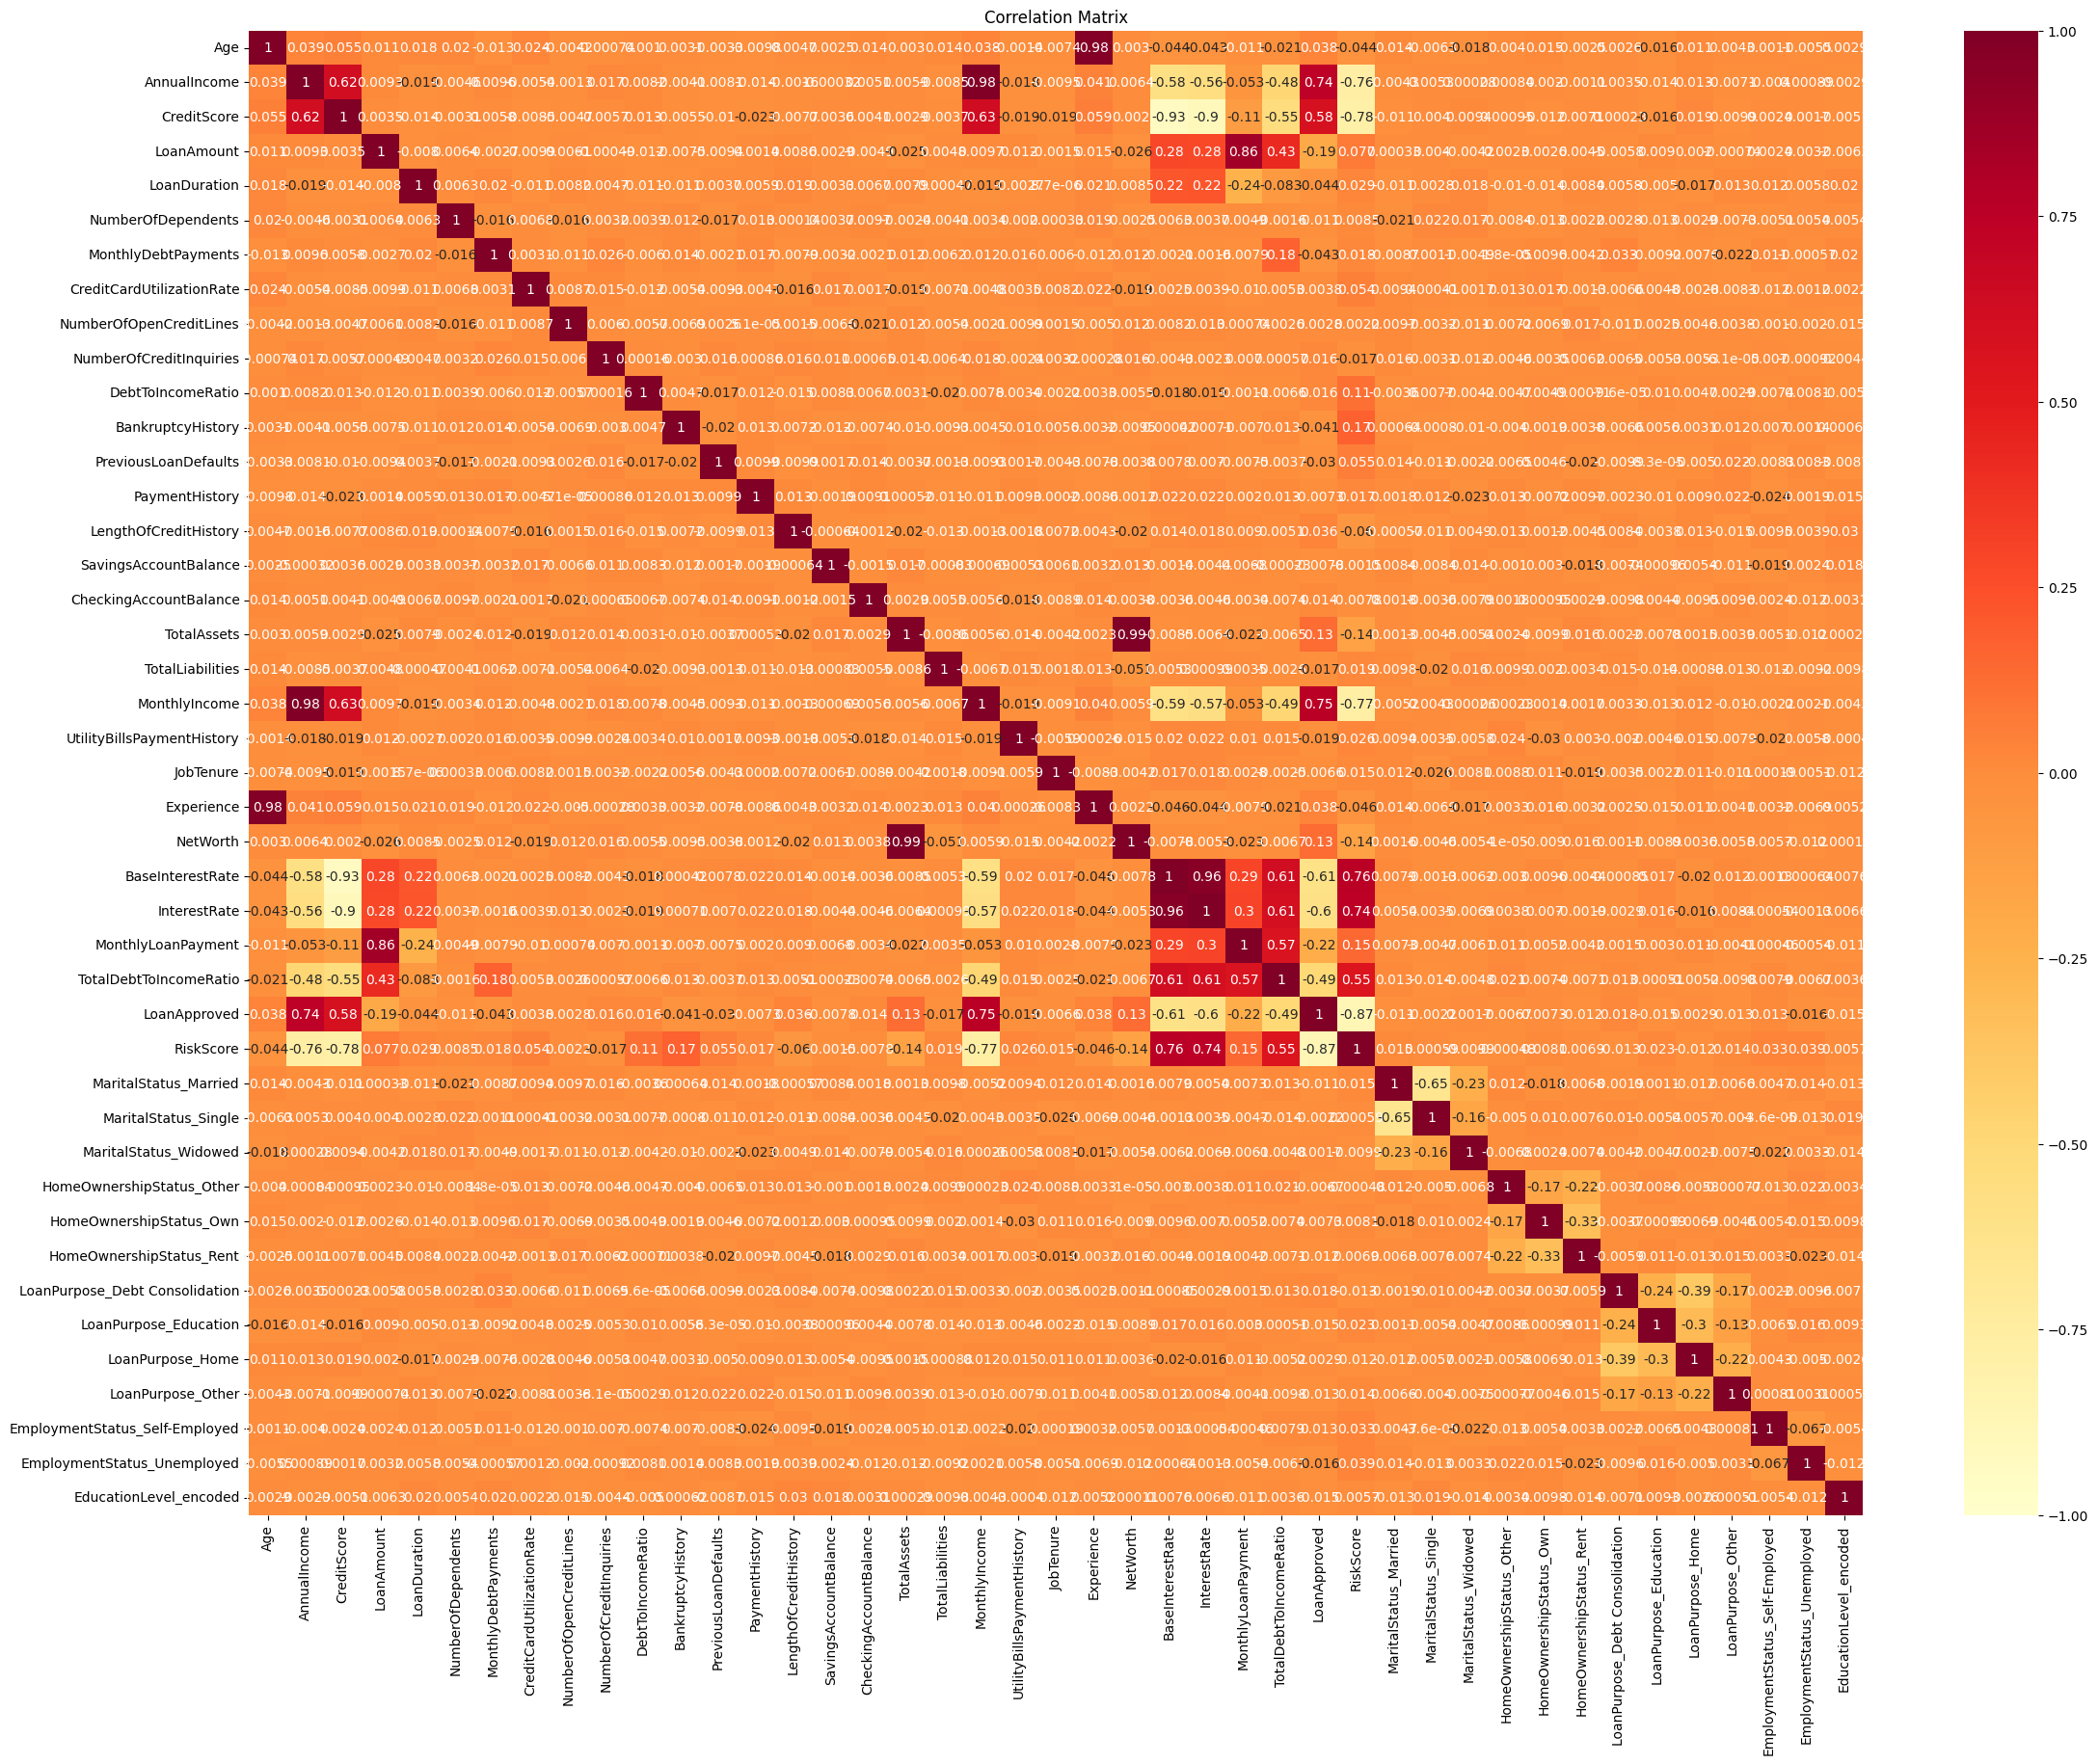

In [18]:
# Матрица корреляции
corr_matrix = df.corr()

plt.figure(figsize=(27, 20))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Проанализируем матрицу и выпишем признаки сильной корреляции:


*   Age и Experience
*   AnnualIncome и MonthlyIncome
*   LoanAmount и MonthlyLoanPayment
*   TotalAssets и NetWorth
*   BaseInterestRate и InterestRate

Таким образом, мы можем просто удалить некоторые из этих признаков.


In [19]:
df = df.drop(['Experience', 'MonthlyIncome', 'MonthlyLoanPayment', 'NetWorth', 'BaseInterestRate'], axis=1)

Снова обучим модель с регуляризацией.

In [20]:
# Обучение модели Ridge-регрессии с выбранными признаками
train_data = df

X_train = train_data.drop('RiskScore', axis=1)
y_train = train_data['RiskScore']

# Создание модели Ridge с заданным значением альфа (параметр регуляризации)
alpha_value = 1.0
model_reg_corr = Ridge(alpha=alpha_value)

# Обучение модели
model_reg_corr.fit(X_train, y_train)

# Прогнозирование
y_pred = model_reg_corr.predict(X_train)

# Оценка модели
mse = mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 20.507805645159785
Mean Absolute Error: 3.5229385472556656
R^2 Score: 0.930942862209641


Выяснили, что удаление столбцов не дает улучшений. Так что не будем работать с коррелирующими признаками, а просто используем Ridge-регуляризацию.

# Шаг 5. Обработка test датасета

Проанализируем тестовый датасет с помощью уже использованных функций

In [29]:
# Подготовка тестовых данных
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/contest 1/test.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          5000 non-null   int64  
 1   ApplicationDate             5000 non-null   object 
 2   Age                         5000 non-null   int64  
 3   AnnualIncome                5000 non-null   int64  
 4   CreditScore                 5000 non-null   int64  
 5   LoanAmount                  5000 non-null   int64  
 6   LoanDuration                5000 non-null   int64  
 7   MaritalStatus               5000 non-null   object 
 8   NumberOfDependents          5000 non-null   int64  
 9   HomeOwnershipStatus         5000 non-null   object 
 10  MonthlyDebtPayments         5000 non-null   int64  
 11  CreditCardUtilizationRate   5000 non-null   float64
 12  NumberOfOpenCreditLines     5000 non-null   int64  
 13  NumberOfCreditInquiries     5000 

In [30]:
print(df_test.isnull().sum())

ID                            0
ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
EmploymentStatus              0
EducationLevel                0
Experience                    0
NetWorth                      0
BaseInte

Пропусков в данных нет, поэтому попробуем удалить дубликаты. А потом будем обрабатывать остальное.

In [31]:
#  Очистка данных
df_test = df_test.drop_duplicates()
df_test.describe()

,ID,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2499.500000,39.796800,133451.609800,678.525800,30502.155000,53.45760,1.530600,544.084000,0.284003,2.971600,...,11010.058167,0.784001,4.979000,17.532000,1.477317e+05,0.200787,0.200608,1103.247711,0.524048,0.516200
std,1443.520003,11.682209,115320.189462,176.450819,29384.921842,24.48938,1.428381,499.481795,0.159059,1.745681,...,9389.355937,0.123768,2.222239,11.429764,3.965453e+05,0.095799,0.098288,1452.591314,0.946996,0.499787
min,0.000000,18.000000,15000.000000,300.000000,1165.000000,12.00000,0.000000,21.000000,0.001717,0.000000,...,1250.000000,0.135743,0.000000,0.000000,1.003000e+03,0.052616,0.044439,29.895741,0.004656,0.000000
25%,1249.750000,31.000000,21719.750000,553.000000,12834.000000,36.00000,0.000000,230.000000,0.158249,2.000000,...,1763.729167,0.707229,3.000000,9.000000,7.144000e+03,0.119306,0.118645,372.774514,0.063932,0.000000
50%,2499.500000,40.000000,92029.500000,727.000000,22289.000000,48.00000,1.000000,400.500000,0.264909,3.000000,...,7636.291667,0.805489,5.000000,17.000000,2.650700e+04,0.180582,0.179172,696.143695,0.168760,1.000000
75%,3749.250000,48.000000,261529.500000,850.000000,37418.500000,60.00000,2.000000,686.000000,0.384122,4.000000,...,21658.854167,0.878772,6.000000,25.000000,1.264388e+05,0.267143,0.267596,1315.406429,0.620982,1.000000
max,4999.000000,80.000000,749283.000000,850.000000,395083.000000,120.00000,6.000000,6925.000000,0.927363,14.000000,...,25000.000000,0.993463,17.000000,60.000000,7.955539e+06,0.800083,0.949101,31256.225411,25.237780,1.000000


Итак, пропусков нет, а значит заполнять их нет необходимости. Преобразуем категориальные признаки, а потом нормализуем все признаки (Дату и ID просто удалим).

In [32]:
# Удаление ненужных столбцов
df_test = df_test.drop('ApplicationDate', axis=1)
df_test = df_test.drop('ID', axis=1)

# Кодирование категориальных признаков с помощью one-hot encoding
df_test = pd.get_dummies(df_test, columns=['MaritalStatus'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['HomeOwnershipStatus'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['LoanPurpose'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['EmploymentStatus'], drop_first=True)

# Кодирование признака EducationLevel с помощью Label Encoding
encoder = LabelEncoder()
df_test['EducationLevel_encoded'] = encoder.fit_transform(df_test['EducationLevel'])
df_test = df_test.drop('EducationLevel', axis=1)

# Масштабирование признаков
scaler = MinMaxScaler()
df_test[num_cols] = scaler.fit_transform(df_test[num_cols])

df_test.describe()

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,UtilityBillsPaymentHistory,JobTenure,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,EducationLevel_encoded
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.351561,0.161316,0.688229,0.074475,0.383867,0.255100,0.075765,0.304960,0.212257,0.166367,...,0.755792,0.292882,0.292200,0.018446,0.198231,0.172628,0.034373,0.020584,0.516200,1.847600
std,0.188423,0.157051,0.320820,0.074597,0.226754,0.238063,0.072347,0.171836,0.124692,0.166666,...,0.144299,0.130720,0.190496,0.049851,0.128165,0.108646,0.046518,0.037530,0.499787,1.330537
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.209677,0.009151,0.460000,0.029623,0.222222,0.000000,0.030272,0.169105,0.142857,0.000000,...,0.666285,0.176471,0.150000,0.000772,0.089221,0.082026,0.010980,0.002349,0.000000,1.000000
50%,0.354839,0.104904,0.776364,0.053625,0.333333,0.166667,0.054968,0.284333,0.214286,0.166667,...,0.780845,0.294118,0.283333,0.003206,0.171200,0.148932,0.021336,0.006504,1.000000,2.000000
75%,0.483871,0.335742,1.000000,0.092033,0.444444,0.333333,0.096321,0.413122,0.285714,0.333333,...,0.866284,0.352941,0.416667,0.015769,0.287005,0.246675,0.041168,0.024425,1.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


Теперь подготовка завершена. Можем предсказывать значения RiskScore

# Шаг 6. Предсказание значений RiskScore для тестового датасета

In [33]:
# Предсказание на тестовых данных
test_data = df_test
y_pred = model_reg.predict(test_data)

In [34]:
# Создание выходного файла
output = pd.DataFrame({'ID': test_data.index, 'RiskScore': y_pred})
output.to_csv('submission.csv', index=False)

In [36]:
output.head(10)

,ID,RiskScore
0,0,32.773855
1,1,57.243471
2,2,29.876034
3,3,33.547542
4,4,34.485670
5,5,73.265756
6,6,30.725984
7,7,29.573561
8,8,31.102934
9,9,61.598845
